In [4]:
import itertools
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from solver import *

plt.rcParams['font.family'] = 'Serif'

large_numbers = [100, 75, 50, 25]
small_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
# Compute spans of all four large selections
print("Generating all possible trees...")
template_trees = list(all_possible_trees(large_numbers+[1, 2]))

print("Computing span...")
small_numbers_combinations = [(i, i) for i in small_numbers]
small_numbers_combinations += list(itertools.combinations(small_numbers, 2))

for small1, small2 in small_numbers_combinations:
    if os.path.exists(f'data/span/{small1}_{small2}_span.txt'):
        continue
    replace_dict = {1: small1, 2: small2}
    print(f"Computing span for {small1}, {small2} ...")

    span = get_numbers_span(large_numbers+[small1, small2], min=100, max=999, replace_placeholder=replace_dict,template_trees=template_trees)
    
    res = []
    for v, t in span.items():
        res.append([v, t.express(replace_dict)])
    res = np.array(res)
    np.savetxt(f'data/span/{small1}_{small2}_span.txt', res, fmt='%s')

Generating all possible trees...
Computing span...


In [ ]:
# Two large selection
small_numbers_combinations = [(i, i) for i in small_numbers]
small_numbers_combinations += list(itertools.combinations(small_numbers, 2))

selection_span = {}
selection_solvability = []
for small1, small2 in small_numbers_combinations:
    if os.path.exists(f"data/span/{small1}_{small2}_span.txt"):
        span = np.loadtxt(f"data/span/{small1}_{small2}_span.txt", dtype=str)
        selection_span[(small1, small2)] = list(map(lambda x: int(x[0]), span))
        selection_solvability.append((small1, small2, len(span)))
selection_solvability = np.array(sorted(selection_solvability, key=lambda x: x[2]))
np.savetxt('data/selection_solvability.txt', selection_solvability, fmt='%s')

Average of exact solves: (795.73)


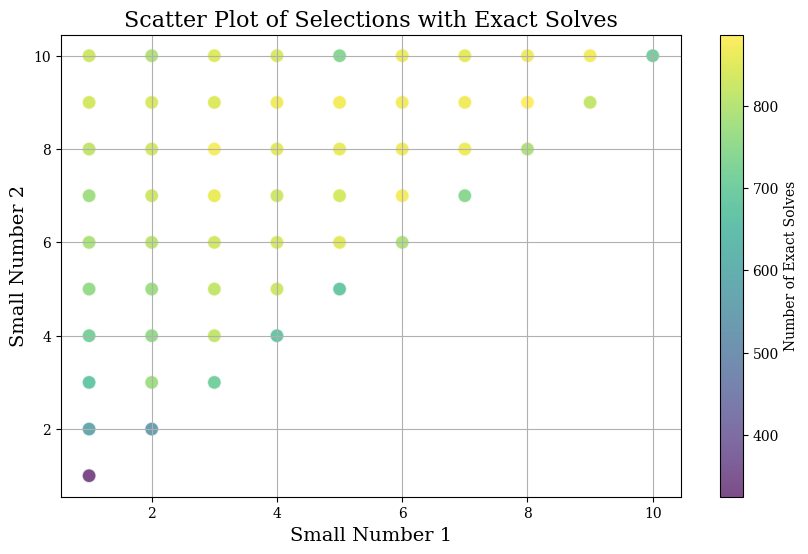

In [31]:
# Exact solves for particular selections
arr = selection_solvability

# Average of exact solves
print(f"Average of exact solves: ({arr[:, 2].astype(int).sum()/len(arr):.2f})")

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(arr[:, 0], arr[:, 1], c=arr[:, 2], cmap='viridis', s=100, alpha=0.7, edgecolors='w')
plt.colorbar(scatter, label='Number of Exact Solves')
plt.xlabel('Small Number 1', fontsize=14)
plt.ylabel('Small Number 2', fontsize=14)
plt.title('Scatter Plot of Selections with Exact Solves', fontsize=16)
plt.grid(True)
plt.savefig('data/scatter_plot.svg', format='svg', dpi=600)

100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 162, 167, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 222, 223, 225, 226, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 258, 267, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 292, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 308, 310, 322, 324, 325, 326, 328, 336, 342, 344, 346, 347, 348, 350, 352, 353, 354, 356, 357, 364, 372, 375, 376, 378, 396, 397, 399, 400, 403, 404, 406, 425, 446, 450, 453, 454, 456, 475, 492, 496, 500, 504, 525, 550, 575, 600, 624, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 900, 925, 

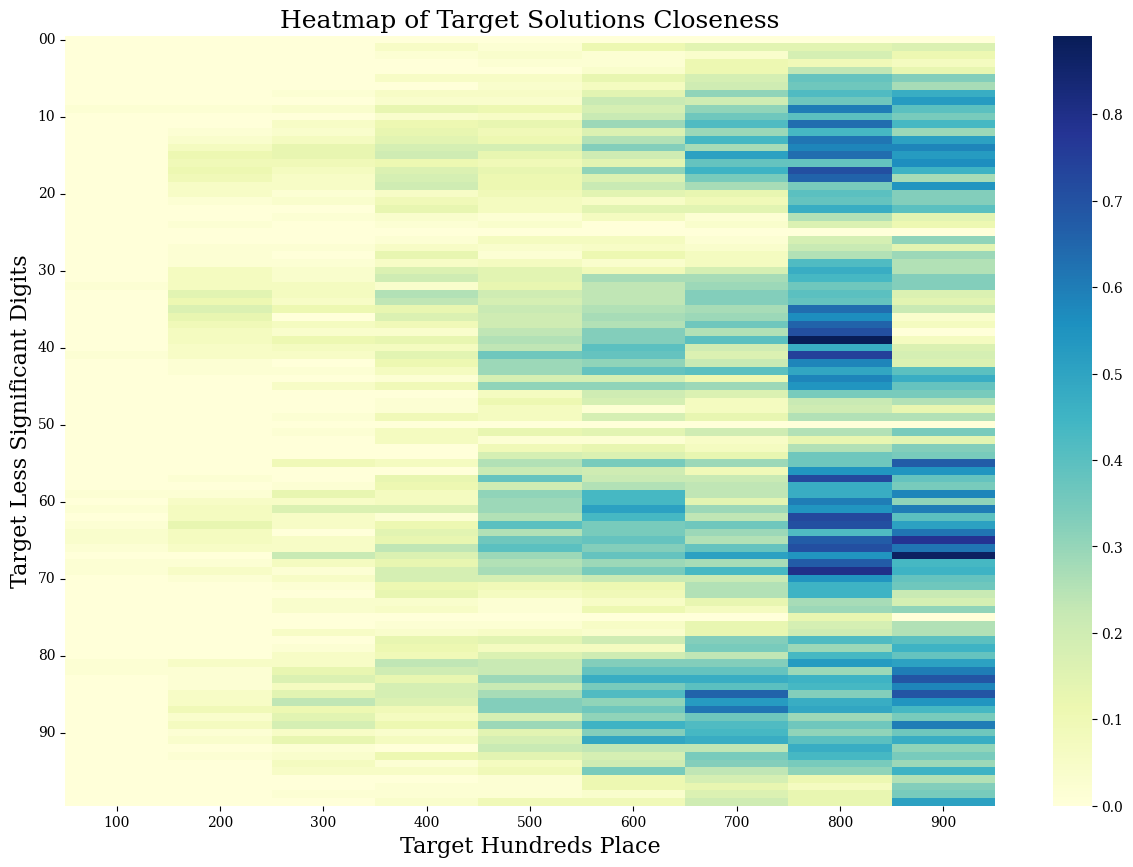

In [25]:
# Mean closeness for each target
target_exact_solves = {i: 0 for i in range(100, 1000)}
target_closeness = []
for target in range(100, 1000):
    closeness_sum = 0
    for selection in selection_span.keys():
        c = 0
        while target - c not in selection_span[selection] and target + c not in selection_span[selection]:
            c += 1
        closeness_sum += c
        
        if c==0:
            target_exact_solves[target]+=1
    
    closeness = closeness_sum / 55  # 55 is the number of selections
    target_closeness.append([target, closeness])

target_exact_solves = list(target_exact_solves.items())
for target, exact_solves in target_exact_solves:
    if exact_solves==55:
        print(f"{target}, ", end='')
print()
# just do ctrl + f
target_exact_solves.sort(key=lambda x: x[1])
target_closeness.sort(key=lambda x: x[1])
np.savetxt('data/target_exact_solves.txt', target_exact_solves, fmt='%s')
np.savetxt('data/target_closeness.txt', target_closeness, fmt=['%d', '%s'])

# Convert target_closeness to a NumPy array
target_closeness_array = np.array(target_closeness)

# Create a 9x100 grid for the heatmap
heatmap_data = np.zeros((100, 9))

# Populate the heatmap data
for target, closeness in target_closeness:
    hundreds = (target // 100) - 1  # 100s place (0-8 for 100-900)
    units = target % 100  # Less significant digits (0-99)
    heatmap_data[units, hundreds] = closeness

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, cbar=True)

# Set the axis labels
plt.title("Heatmap of Target Solutions Closeness", fontsize=18)
plt.xlabel("Target Hundreds Place", fontsize=16)
plt.ylabel("Target Less Significant Digits", fontsize=16)
plt.xticks(ticks=np.arange(9) + 0.5, labels=[f"{i}00" for i in range(1, 10)])
plt.yticks(ticks=np.arange(0, 100, 10) + 0.5, labels=[f"{i:02d}" for i in range(0, 100, 10)])

plt.savefig('data/target_solutions_heatmap.svg', format='svg', dpi=1200)

In [34]:
# Simulation
n = 1000000
score_sum = 0
for _ in range(n):
    target = np.random.randint(100, 1000)
    selection = np.random.choice(small_numbers*2, 2, replace=False)
    selection.sort()
    selection = tuple(selection)
    
    c = 0
    while target-c not in selection_span[selection] and target+c not in selection_span[selection]:
        c += 1
    score_sum += 10 - c

average_score = score_sum / n
print(f"Four large selection average score : {average_score}")

Four large selection average score : 9.878865
